# Сборный проект 1: интернет-магазин Стримчик

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Задача - выявить определяющие успешность игры закономерности. 
Сейчас декабрь 2016 года, мы планируем кампанию на 2017.

## Содержание
1. [Изучение данных](#data1)
2. [Подготовка данных к анализу](#data2)
3. [Исследовательский анализ данных](#eda)
4. [Портрет пользователя](#user)
5. [Проверка гипотез](#hypotheses)
6. [Общий вывод](#results)

## Изучение данных <a name="data1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
# opening file 
try:
    df = pd.read_csv('/datasets/games.csv') # Yandex path
except:
    df = pd.read_csv('games.csv') # personal path

In [3]:
# checking general info and data type
df.info()

# identifying NaNs
print(df.isna().sum())
display(round(df.isna().sum() * 100 / len(df), 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# checking for duplicates
df.duplicated().sum()

0

In [6]:
# bringing column names to lower string
df.columns = df.columns.str.lower()

In [7]:
# identifying unique values for columns
for column in df.columns:
    print(column, df[column].unique()) 

name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
year_of_release [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
na_sales [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+0

#### Вывод 

- Данные собраны в 16715 строках, имеются пропуски, полностью дублирующихся данных нет
- Необходимая обработка обобщена в таблице ниже:

| Столбец | Необходимая обработка |
| :-----------------|:--------------------|
| name | есть 2 строки с пропусками (0.01% строк) - проверить, можно ли удалить| 
| platform | без изменений | 
| year_of_release | есть 269 строк с пропусками (1.61%) - заменим NaN на 0, чтобы продолжить работу | 
| year_of_release | поменять тип с float на int|
| genre | есть 2 строки с пропусками (0.01%) - проверить, можно ли удалить (возможно связаны c пропусками в name)| 
| na_sales | без изменений  | 
| eu_sales | без изменений  | 
| jp_sales | без изменений  | 
| other_sales | без изменений  | 
| critic_score | есть 8578 строк с пропусками (51.32%)| 
| user_score | есть 6701 строк с пропусками (40.09%)| 
| user_score | поменять тип с object на float|
| user_score | заменим tbd на пропуск|
| rating | есть 6766 строк с пропусками (40.48%) - заменим NaN на 'unknown' просто для более понятного обозначения отсутствия рейтинга, также заменим RP (rating pending) на 'unknown'|

## Подготовка данных к анализу <a name="data2"></a>

#### Предобработка данных

In [8]:
# checking names & genre NaNs
df[(df['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как и предполагалось, пропуски в name и genre связаны. Учитывая то, что это всего 0.01% от всех строк + информация по рейтингам тоже отсутствует, мы можем удалить эти 2 строки

In [9]:
# droping 2 rows
df = df.dropna(subset=['name'])

In [10]:
# replacing NaNs in year_of_release to 0 
df['year_of_release'] = df['year_of_release'].fillna(0)

# changing type of year_of_release from float to int
df['year_of_release'] = df['year_of_release'].astype('int')

In [11]:
# grouping NaNs in critic_score, user_score and rating by year
 
def grouping(column):
    return (
    df[(df[column].isna())].fillna(1).pivot_table(
        index = 'year_of_release', 
        values = column, 
        aggfunc = 'count'
        )
    .sort_values(column, ascending = False)
) 

for column in ['critic_score', 'user_score', 'rating']:
    display(grouping(column))

,critic_score
year_of_release,
2009,775
2010,755
2008,712
2011,636
2007,505
2006,386
2015,381
1998,351
2012,332


,user_score
year_of_release,
2010,457
2008,440
2011,418
2009,407
2007,376
1998,348
2006,330
1999,299
2012,290


,rating
year_of_release,
2010,456
2008,446
2011,433
2009,415
2007,376
1998,347
2006,328
2012,298
1999,296


- Принимая во внимание тот факт, что конкретной закономерности в распределении пропусков нет (была гипотеза, что возможно до какого-то года оценки не проставлялись), ничего сделать с пропусками в critic_score, user_score и rating не можем, оставляем как есть. Заменять их на медиану и среднее смысла нет, ибо это исказит результаты анализа.
- Возможная причина появления пропусков - плохие продажи - игра была настолько непопулярна, что даже оценки не выставлялись
- Столбец user_score содержит также значение tbd, что значит to be defined - то есть на данный момент оценки нет, что для нас равносильно пропуску. Заменим также эти значения на пропуски
- В столбце rating помимо пропусков есть значение RP (rating pending) - то есть на данный момент рейтинга нет, что для нас равносильно пропуску. Заменим также эти значения на пропуски

In [12]:
# replacing tbd in user_score to NaN 

df['user_score'] = df['user_score'].str.replace('tbd', '')

In [13]:
# changing type from object to float in user_score and rating

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [14]:
# replacing NaNs and RP in rating to 'unknown'

df['rating'] = df['rating'].fillna('Unknown')
df['rating'] = df['rating'].str.replace('RP','Unknown')

Запланированная предобработка данных завершена, можно переходить к следующему этапу

#### Расчет суммарных продаж

In [15]:
# calculating total_sales

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Данные готовы к дальнейшему анализу

## Исследовательский анализ данных <a name="eda"></a>

In [16]:
# grouping number of games per year

df_pivot_gamescount = (
    df.pivot_table(
        index = 'year_of_release', 
        values = 'name', 
        aggfunc = 'count'
        )
    .sort_values('name', ascending = False)
)
df_pivot_gamescount

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


In [17]:
# means for 2006-2011 and 2012-2016

print(df_pivot_gamescount.query('year_of_release >= 2006 and year_of_release <= 2011').mean())
df_pivot_gamescount.query('year_of_release >= 2012 and year_of_release <= 2016').mean()

name    1241.166667
dtype: float64


name    577.2
dtype: float64

С 2006 по 2011 год ежегодно выпускалось больше 1000 игр (в среднем 1241), дальше с 2012 по 2016 по 577 в среднем. В дальшейнем нам нужно будет определить актуальный период для анализа, скорее всего имеет смысл взять данные с 2012 года, ибо разрыв с предыдущей пятилеткой довольно большой, если смотреть по количеству выпущенных игр

In [18]:
# sales per platform

df_pivot_platform = (
    df.pivot_table(
        index = 'platform', 
        values = 'total_sales', 
        aggfunc = 'sum'
        )
    .sort_values('total_sales', ascending = False)
) 

display(df_pivot_platform.head(10))
df_pivot_platform.describe()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


,total_sales
count,31.000000
mean,287.525484
std,348.220029
min,0.030000
25%,22.150000
50%,200.040000
75%,304.095000
max,1255.770000


Возьмем топ-4 платформ по продажам - PS2, X360, PS3, Wii (разрыв со следующей по очереди платформой довольно велик, поэтому отсекаем эти 4) 

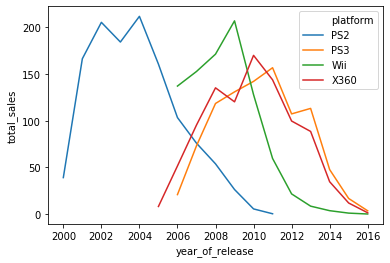

In [19]:
# graphs for top 4 platforms 

top4_platforms = ['PS2', 'X360', 'PS3', 'Wii']
df_top4_platforms = df.query('platform in @top4_platforms and year_of_release > 0').groupby(['platform', 'year_of_release']).agg(
    {'total_sales':'sum'}
).reset_index()

sns.lineplot(data=df_top4_platforms, x='year_of_release', y='total_sales', hue='platform', ci=None)
# plt.plot(df_top4_platforms['year_of_release'], df_top4_platforms['total_sales'])

Судя по графику, платформа высокоактивна в плане продаж примерно 10 лет - в периоде с 2006 по 2016 пик приходится на 2008-2009 год, к 2016 году части платформ уже нет. Учтем также информацию, полученную выше, с 2006 по 2011 год ежегодно выпускалось больше 1000 игр (в среднем 1241), дальше с 2012 по 2016 по 577 в среднем.

То есть имеет смысл взять период с 2012 по 2015 годы как актуальный, чтобы рассмотреть последние поколения платформ и учесть текущий статус развития игровой индустрии.

In [20]:
# creating dataframe with data after from 2012 to 2015

df_final = df.query('year_of_release >= 2012 and year_of_release <= 2015')

,platform,total_sales
0,PS3,285.19
1,PS4,244.89
2,X360,235.02
3,3DS,179.47
4,XOne,133.17
5,WiiU,77.59
6,PC,57.40
7,PSV,44.93
8,Wii,35.19
9,DS,12.55


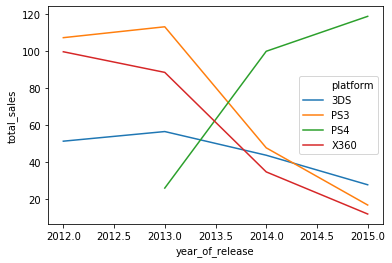

In [21]:
# identifying profitable platforms

df_final_platforms = df_final.groupby('platform').agg(
    {'total_sales':'sum'}).sort_values('total_sales', ascending = False).reset_index()
display(df_final_platforms)

top4_platforms2 = df_final_platforms['platform'].head(4)

df_final_platforms2 = df_final.query('platform in @top4_platforms2').groupby(['platform', 'year_of_release']).agg(
    {'total_sales':'sum'}).reset_index()

sns.lineplot(data=df_final_platforms2, x='year_of_release', y='total_sales', hue='platform', ci=None)

Лидерами суммарных продаж в период с 2012 по 2015 остаются PS3, X360, PS4 и 3DS. Видно, что PS4 только вышла (релиз состоялся в конце 2013 года). Сравнимыми с PS4 платформами будут XOne, WiiU (восьмое поколение, самые новые по дате релиза). Седьмое поколение - PS3, X360, Wii

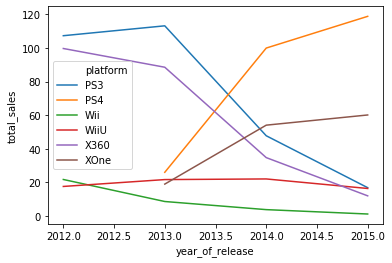

In [22]:
# graph for PS3, PS4, X360, XOne, Wii, WiiU

newest_platforms =['PS4', 'XOne', 'WiiU', 'PS3', 'X360', 'Wii']

df_final_platforms3 = df_final.query('platform in @newest_platforms').groupby(['platform', 'year_of_release']).agg(
    {'total_sales':'sum'}).reset_index()

sns.lineplot(data=df_final_platforms3, x='year_of_release', y='total_sales', hue='platform', ci=None)

Данный график явно показывает зарождение восьмого поколения платформ и угасание седьмого. Перспективными на 2017 год имеет смысл считать платформы восьмого поколения - PS4, XOne, WiiU

count     11.000000
mean     119.690000
std      100.873509
min       11.190000
25%       40.060000
50%       77.590000
75%      207.245000
max      285.190000
Name: total_sales, dtype: float64

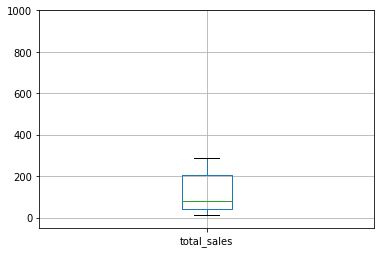

In [23]:
# boxplot for total_sales

display(df_final_platforms['total_sales'].describe())
plt.ylim(-50, 1000)
df_final_platforms.boxplot('total_sales')

Из диаграммы размаха видно, что выбросов нет.

(0, 90)

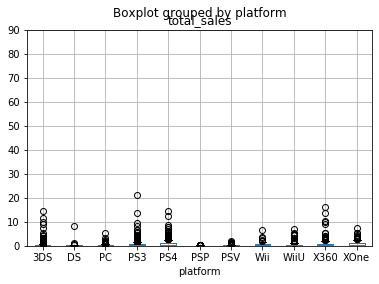

In [24]:
# boxplot for total_sales per platform 
df_final.boxplot('total_sales', by='platform')
plt.ylim(0, 90)

Если мы смотрим диаграммы размаха отдельно по каждой платформе, количество выбросов очень большое, что связано с успехом каждой отдельной игры.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7695309590>,
 year_of_release   -0.125106
 user_score        -0.021714
 critic_score       0.331497
 jp_sales           0.461669
 na_sales           0.938914
 eu_sales           0.970882
 other_sales        0.985984
 total_sales        1.000000
 Name: total_sales, dtype: float64)

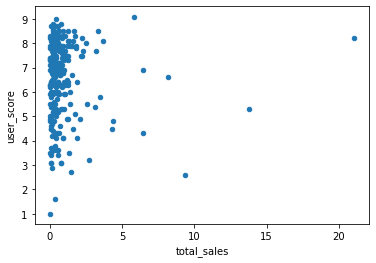

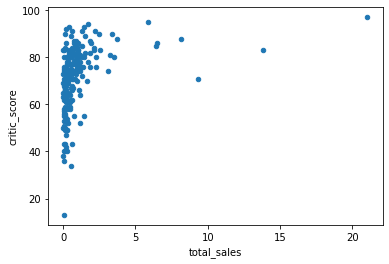

In [25]:
# checking correlation between total_sales and user_score for PS3

df_final_PS3 = df_final.query('platform == "PS3"')

def corr_analysis(df_final_platform):
    corr_matrix = df_final_platform.corr()
    graph1 = df_final_platform.plot(x='total_sales', y='user_score', kind='scatter')
    graph2 = df_final_platform.plot(x='total_sales', y='critic_score', kind='scatter')
    table1 = corr_matrix['total_sales'].sort_values()
    return graph1, graph2, table1

corr_analysis(df_final_PS3)

- Корреляционная матрица и диаграммы рассеяния показали интересный результат для платформы PS3 - как таковой связи оценки и продаж нет. 
- На диаграммах рассеяния видно, что более высокие оценки в принципе чаще проставлялись при низких продажах (учитывая то, что это продажи по годам, можно сказать, что оценки ставились, когда игра только выходила и еще не успевала набрать продажи) - это верно и для оценок критиков, и для оценок пользователей.
- При этом, если корреляция между оценками пользователей и продажами практически отсутсвует (-0.02), то с оценками критиков наблюдается очень слабая связь (0.33)
 
Проверим, если результаты для X360 и PS4 отличаются

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7695415890>,
 year_of_release   -0.125340
 user_score        -0.009605
 critic_score       0.360573
 jp_sales           0.546470
 eu_sales           0.930863
 na_sales           0.979238
 other_sales        0.995424
 total_sales        1.000000
 Name: total_sales, dtype: float64)

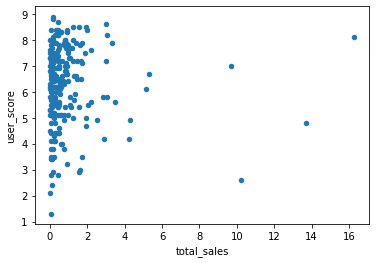

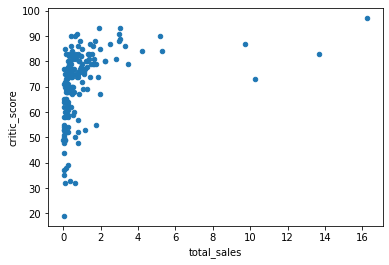

In [26]:
# checking correlation between total_sales and user_score for X360

df_final_X360 = df_final.query('platform == "X360"')
corr_analysis(df_final_X360)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76952a7e50>,
 year_of_release   -0.137386
 user_score         0.024231
 critic_score       0.431848
 jp_sales           0.588567
 na_sales           0.939381
 eu_sales           0.961354
 other_sales        0.998291
 total_sales        1.000000
 Name: total_sales, dtype: float64)

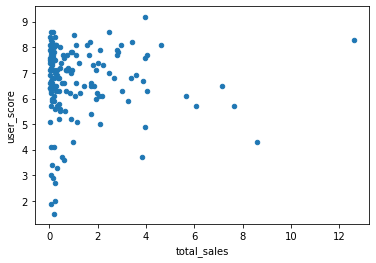

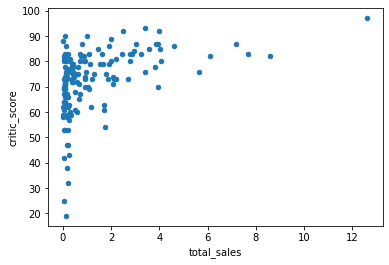

In [27]:
# checking correlation between total_sales and user_score for PS4

df_final_PS4 = df_final.query('platform == "PS4"')
corr_analysis(df_final_PS4)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7695195b50>,
 year_of_release   -0.088450
 user_score         0.882709
 eu_sales           0.975897
 jp_sales           0.992397
 na_sales           0.993196
 other_sales        0.995104
 total_sales        1.000000
 critic_score            NaN
 Name: total_sales, dtype: float64)

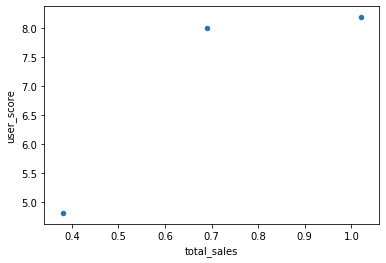

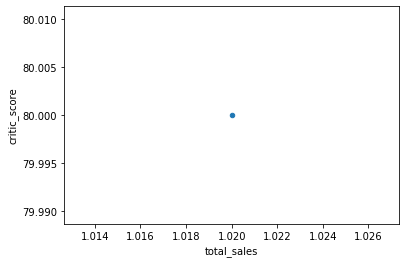

In [28]:
# checking correlation between total_sales and user_score for DS

df_final_DS = df_final.query('platform == "DS"')
corr_analysis(df_final_DS)

- Диаграммы рассеяния и корреляционные матрицы для X360, PS4 показали относительно те же результаты, что и для PS3 с некоторыми различиями
- Для PS4 связь между оценками критиков и продажами чуть выше, чем для PS3, X360 (0.43 vs 0.33, 0.36), а также  связь с оценками пользователей положительная (0.02), когда для PS3 и 360 она была отрицательная (-0.02 и -0.09)
- Кроме того, если смотреть чисто по пользовательским оценкам, частые значения начинаются выше 2, для оценок критиков же у PS3 преобладают значения выше 40, у X360 выше 30, а на PS4 - выше 60

,genre,total_sales
0,Action,411.01
1,Shooter,266.51
2,Role-Playing,174.62
3,Sports,157.58
4,Misc,82.44
5,Platform,57.77
6,Racing,50.71
7,Fighting,40.02
8,Simulation,33.23
9,Adventure,25.61


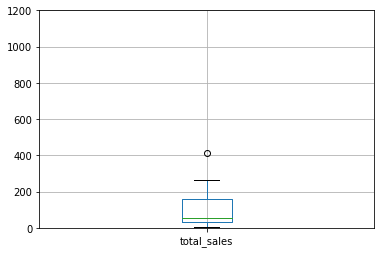

In [29]:
# total_sales by genre
df_final_genre = df_final.groupby('genre').agg(
    {'total_sales':'sum'}).sort_values('total_sales', ascending = False).reset_index()
display(df_final_genre)

plt.ylim(0, 1200)
df_final_genre.boxplot('total_sales')

Диаграмма размаха показывает, что явный выброс - action, при этом самые популярные жанры: action, sports и shooter, причем action явный лидер, а наименее прибыльные жанры - puzzle, strategy 

## Портрет регионального пользователя <a name="user"></a>

In [30]:
# analysis for na_sales

def regional_analysis(column):
    table1 = (
    df_final.pivot_table(
        index = 'platform', 
        values = column, 
        aggfunc = 'sum'
        )
    .sort_values(column, ascending = False)
) 
    table1['share'] = table1[column]/table1[column].sum()
    table1.style.format({'share': "{:.2%}"})
    
    table2 = (
    df_final.pivot_table(
        index = 'genre', 
        values = column, 
        aggfunc = 'sum'
        )
    .sort_values(column, ascending = False)
) 
    table2['share'] = table2[column]/table2[column].sum()
    table2.style.format({'share': "{:.2%}"})
    
    graph1 = plt.scatter(x=df_final[column], y=df_final['rating'])
    
    return table1.head(), table2.head(), graph1


regional_analysis('na_sales')

(          na_sales     share
 platform                    
 X360        139.36  0.255219
 PS3         102.71  0.188100
 PS4          87.25  0.159787
 XOne         78.85  0.144403
 3DS          51.17  0.093711,
               na_sales     share
 genre                           
 Action          168.55  0.308677
 Shooter         128.53  0.235386
 Sports           73.99  0.135503
 Role-Playing     58.11  0.106421
 Misc             37.43  0.068548,
 <matplotlib.collections.PathCollection at 0x7f7694c6ac10>)

- За исследуемый период самыми популярными платформами для североамериканского пользователя (c точки зрения продаж) являются X360 (25.5%), PS3 (18.8%), PS4 (16.0%) и XOne (14.4%), 3DS (9.4%)
- По жанрам лидируют action (30.9%), shooter (23.5%), sports (13.6%), role-playing (10.6%), misc (6.9%) - топ-5 жанров для североамериканского пользователя практически полностью совпадают с глобальным распределением продаж
- Расшифруем рейтинги для удобства:

| Рейтинг | Расшифровка | Соответствующий возраст|
| :-----------------|:--------------------|:--------------------|
| EC | early childhood| 3+ |
| E | everyone | 6+| 
| E10+ | everyone 10+ | 10+ |
| T | teen | 13+ |
| M | mature | 17+|

- Касательно влияния рейтинга на продажи - игры с рейтингом mature более прибыльны (больше значений с высокими прибылями), скорее всего просто потому, что они изначально дороже. Игр для самых маленьких просто нет (в выборке за актуальный период они видимо не выпускались, ибо нет нишы)

In [ ]:
# analysis for eu_sales
regional_analysis('eu_sales')

- За исследуемый период самыми популярными платформами для европейского пользователя (c точки зрения продаж) являются PS4 (24.0%), PS3 (23.2%), X360 (16.2%), XOne (9.2%), 3DS (8.8%) 
- По жанрам лидируют action (32.6%), shooter (21.4%), sports (12.5%), role-playing (9.7%), misc (5.6%) - топ-5 жанров совпадают с Северной Америкой
- Что касается рейтинга, опять же, игры с рейтингом mature дороже, но также пользуютс популярностью игры с рейтингом Е

In [ ]:
# analysis for jp_sales
regional_analysis('jp_sales')

- За исследуемый период самыми популярными платформами для японского пользователя (c точки зрения продаж) являются 3DS (46.0%), PS3 (19.6%), PSV (10.1%), WiiU (7.1%), PSP (6.0%) - что отличается от североамериканского и европейского потребителя. Преимущество 3DS (nintendo) в Японии очевидно, ибо это японская разработка, выпущенная в Японии и США и Канаде.
- Ситуация по жанрам также отличается от Европы и Северной Америки, возмонжо это связано с типом игр, привязанным к платформам. Топ-5 жанров японского потребителя -  role-playing (33.9%), action (26.3%), misc (6.8%),  simulation (5.8%), fighting (5.0%)
- В целом, диаграмма рассеяния отличается визуально от Северной Америки и Европы, тут большая часть значений по всем рейтингам сосредоточена на низких уровнях прибыли.

## Проверка гипотез <a name="hypotheses"></a>

#### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
 - H0 = средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскему рейтингу платформы PC
 - H1 = средние пользовательские рейтинги не равны

Сначала подготовим выборки - они будут из одной и той же генеральной совокупности, поэтому оценивать дисперсию будем по объединенному датасету в дальнейшем

Проверяем гипотезу о равенстве, поэтому будем делать двусторонний тест

In [ ]:
# creating subsets for Xbox One & PC

df_final_XOne = df_final.query('platform == "XOne"')
df_final_PC = df_final.query('platform == "PC"')

In [ ]:
# calculating mean, std and var for subsets

def stat_calcs(subset):
    mean = round(subset.mean(),2)
    var = round(np.var(subset, ddof=1),2)
    std = round(np.std(subset, ddof=1),2)
    return print('mean:', mean), print('var:', var), print('std:', std)

print('XOne stats')
stat_calcs(df_final_XOne['user_score'])
print('')
print('PC stats')
stat_calcs(df_final_PC['user_score'])

In [ ]:
# calculating number of values in susbets

print('XOne stats:', df_final_XOne['user_score'].count())
print('PC stats:', df_final_PC['user_score'].count())

XOne stats: 116
PC stats: 161


In [ ]:
# checking hypothesis 1

array_XOne = df_final_XOne['user_score']
array_PC = df_final_PC['user_score']

alpha = 0.05 # чем больше значений в выборке, тем меньше должен быть критический уровень значимости для минимизации ошибок

results = st.ttest_ind(array_XOne, array_PC, equal_var = True, nan_policy = 'omit') 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.9463196313130704
Не получилось отвергнуть нулевую гипотезу


В результате теста мы не отвергаем нулевую гипотезу, то есть средние пользовательские рейтинги для платформ Xbox One и PC могут и быть равны. 

И действительно:
- XOne - 6.48
- PC - 6.47

#### Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные:
 - H0 = средний пользовательский рейтинг жанра Action равен среднему пользовательскему рейтингу жанра Sports
 - H1 = средние пользовательские рейтинги не равны

Сначала подготовим выборки - они будут из одной и той же генеральной совокупности, поэтому оценивать дисперсию будем по объединенному датасету в дальнейшем

Проверяем гипотезу о равенстве, поэтому будем делать двусторонний тест

In [ ]:
# creating subsets for Action & Sports

df_final_action = df_final.query('genre == "Action"')
df_final_sports = df_final.query('genre == "Sports"')

In [ ]:
# calculating mean, std and var for subsets

print('Action stats')
stat_calcs(df_final_action['user_score'])
print('')
print('Sports stats')
stat_calcs(df_final_sports['user_score'])

Action stats
mean: 6.86
var: 1.83
std: 1.35

Sports stats
mean: 5.46
var: 2.78
std: 1.67


(None, None, None)

In [ ]:
# calculating number of values in susbets

print('Action stats:', df_final_action['user_score'].count())
print('Sports stats:', df_final_sports['user_score'].count())

Action stats: 438
Sports stats: 158


In [ ]:
# checking hypothesis 2

array_action = df_final_action['user_score']
array_sports = df_final_sports['user_score']

alpha = 0.05 # чем больше значений в выборке, тем меньше должен быть критический уровень значимости для минимизации ошибок

results = st.ttest_ind(array_action, array_sports, equal_var = True, nan_policy = 'omit') 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.374468453452166e-23
Отвергаем нулевую гипотезу


В результате теста мы отвергаем нулевую гипотезу, то есть средние пользовательские рейтинги для жанров Actions и Sports не равны. 

И действительно:
- Action - 6.86
- Sports - 5.46

## Общий вывод <a name="results"></a>

- Оптимальным периодом для планирования продаж является период с 2012 по 2015 год, ибо он отражает ситуацию на рынке (появление новых платформ, меньшее количество выпускаемых игр)
- На какой платформе выпускать игру также играет роль, лидерами продаж в период с 2012 по 2015 остаются PS3, X360, PS4 и 3DS. Перспективными на 2017 год имеет смысл считать платформы восьмого поколения - PS4, XOne, WiiU
- Как таковой связи оценки пользователей и критиков и продаж нет. На диаграммах рассеяния видно, что более оценки в принципе чаще проставлялись при низких продажах (учитывая то, что это продажи по годам, можно сказать, что оценки ставились, когда игра только выходила и еще не успевала набрать продажи).
- Играет роль жанр игры - самые популярные жанры: action, sports и shooter, причем action явный лидер, а наименее прибыльные жанры - puzzle, strategy 
- Анализа показал, что также важно учитывать таргетируемый регион продаж, ибо если Северная Америка и Европа относительно схожи в поведении потребителей, Япония отличается с точки зрения более популярных жанров и платформ. 

| Регион | Популярные жанры по убыванию | Популярные платформы по убыванию|
| :-----------------|:--------------------|:--------------------|
| Global | Action, Sports, Shooter| PS3, PS4, X360, 3DS |
| North America | Action, Shooter, Sports, Role-playing, Misc | X360, PS3, PS4, XOne, 3DS| 
| Europe | Action, Shooter, Sports, Role-playing, Misc | PS4, PS3, X360, XOne, 3DS |
| Japan | Role-playing, Action, Misc, Simulation, Fighting | 3DS, PS3, PSV, WiiU, PSP|

- Рейтинг также оказывает влияние на продажи - игры для взрослых (с рейтингом mature) более прибыльны
- Статистический анализ не отверг гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC; но при этом отверг гипотезу о равенстве средних пользовательских рейтингов для жанров Actions и Sports